# 决策树

In [1]:
import numpy as np
import os 
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # pental length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='./img/iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

![deci](../DecisionTree/img/iris_tree.png)

## 决策边界

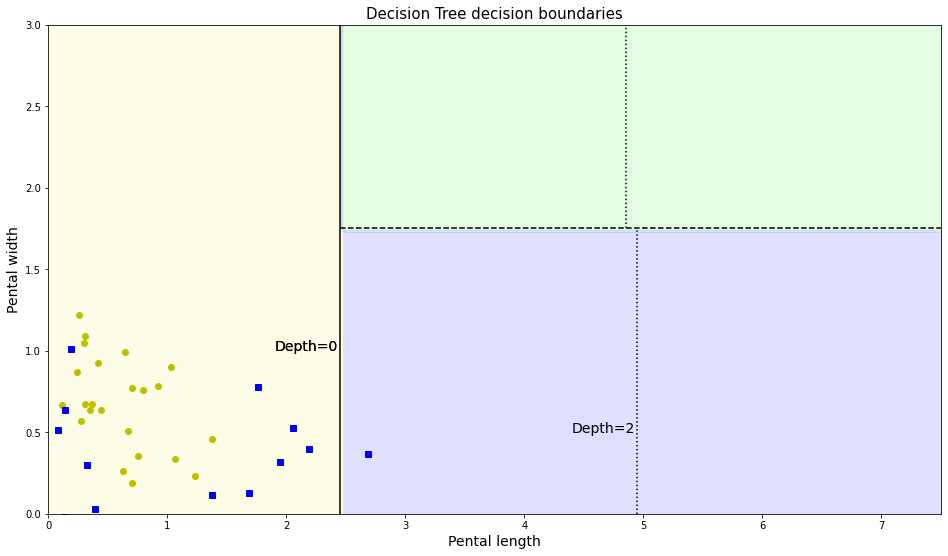

In [37]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3],
                           iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label='Iris-Setosa')
        plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', label='Iris-Versicolor')
        plt.plot(X[:,0][y==2], X[:,1][y==2], 'g^', label='Iris-Virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel('Pental length', fontsize=14)
        plt.ylabel('Pental width', fontsize=14)
    else:
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='lower right', fontsize=14)

plt.figure(figsize=(16,9))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], 'k-')
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--')
plt.plot([4.95, 4.95], [0, 1.75], 'k:')
plt.plot([4.85, 4.85], [1.75, 3], 'k:')
plt.text(1.9, 1.0, 'Depth=0', fontsize=14)
plt.text(1.9, 1.0, 'Depth=0', fontsize=14)
plt.text(4.4, 0.5, 'Depth=2', fontsize=14)
plt.title('Decision Tree decision boundaries', fontsize=15)
plt.show()

## 概率估计
输入数据：花瓣长 5cm, 宽 1.5cm 的花， 相应的叶节点是深度为 2 的左节点，因此决策树应输出：
- Iris-Setosa 为 0% （0/54）
- Iris-Versicolor 为 90.7% （49/54）
- Iris-Virginica 为 9.3% （5/54）

In [38]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [39]:
tree_clf.predict([[5,1.5]])

array([1])

## 决策树中的正则化
**Decision TreeClassifier类**还有一些参数限制了决策树的形状：
- min_samples_split （节点在分割之前必需具有最小的样本数）
- min_samples_leaf （叶子节点必须具有的最小样本数）
- max_leaf_nodes （叶子节点的最大数量）
- max_features （在每个节点处评估用于拆分的最大特征数）

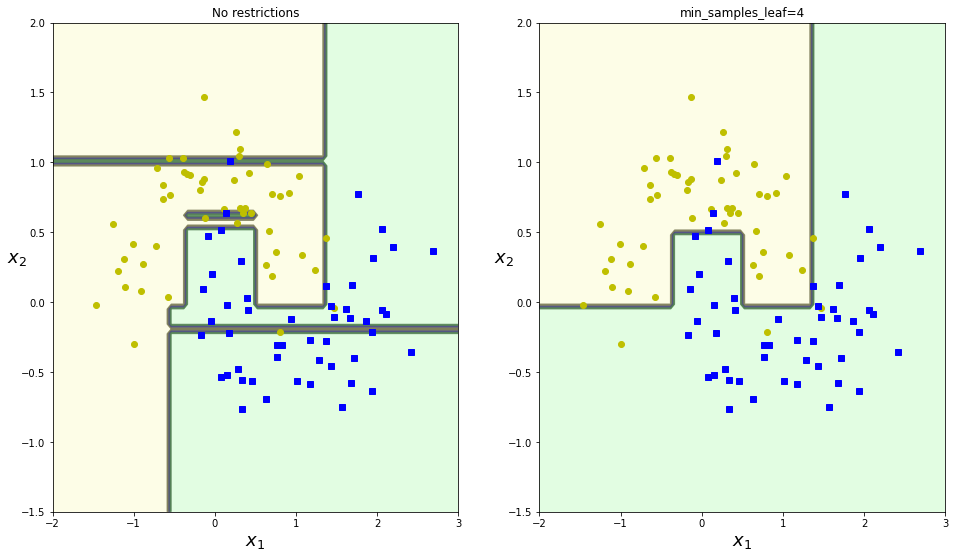

In [40]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
tree_clf_1 = DecisionTreeClassifier(random_state=42) 
tree_clf_2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_clf_1.fit(X, y)
tree_clf_2.fit(X, y)
plt.figure(figsize=(16,9))
plt.subplot(121)
plot_decision_boundary(tree_clf_1, X, y, axes=[-2,3,-1.5,2],iris=False)
plt.title('No restrictions')
plt.subplot(122)
plot_decision_boundary(tree_clf_2, X, y, axes=[-2,3,-1.5,2],iris=False)
plt.title('min_samples_leaf=4')
plt.show()


## 回归任务

In [41]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4*(X-0.5)**2
y = y + np.random.randn(m, 1)/10

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [43]:
export_graphviz(
    tree_reg,
    out_file=('./img/regression_tree.dot'),
    feature_names=['x1'],
    rounded=True,
    filled=True
)

![regression_tree](./img/regression_tree.png)